In [1]:
# import necessaary libraries
import pandas as pd

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='8awPMT8HRg839hzTy7f2VpFISC8zDTX9EgncnH2Js6sX',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'eda-donotdelete-pr-6jesv4datddkha'
object_key = 'Iris.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df=df_data_1.copy()

In [4]:
# See the head of the data
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# See the tail
iris_df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
# See the unique values
iris_df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
# See the value counts
iris_df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
# See the statistical description
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
import numpy as np
sales_data = {"Person": ["Rajesh","Raju", "Pradeep", "Amit", "Rakesh", "Suresh", "Raj", "Raju"], 
            "Company" : [ "CompA","CompA", "CompA", "CompB", "CompB", "CompC", "CompC", "CompA"],
             "Sales"  : [   250  ,  250  ,   150  ,   340  ,   np.nan ,   243  ,   350  ,   250],
             "Age"    : [    23  ,  24   ,   25   ,   250  ,  np.nan,   27   ,    24  ,    24] }
sales_df = pd.DataFrame(sales_data)
sales_df

,Person,Company,Sales,Age
0,Rajesh,CompA,250.0,23.0
1,Raju,CompA,250.0,24.0
2,Pradeep,CompA,150.0,25.0
3,Amit,CompB,340.0,250.0
4,Rakesh,CompB,NaN,NaN
5,Suresh,CompC,243.0,27.0
6,Raj,CompC,350.0,24.0
7,Raju,CompA,250.0,24.0


In [16]:
sales_df.duplicated().sum()

1

In [17]:
# fix duplicates
sales_df.drop_duplicates(inplace=True)

In [18]:
sales_df

,Person,Company,Sales,Age
0,Rajesh,CompA,250.0,23.0
1,Raju,CompA,250.0,24.0
2,Pradeep,CompA,150.0,25.0
3,Amit,CompB,340.0,250.0
4,Rakesh,CompB,NaN,NaN
5,Suresh,CompC,243.0,27.0
6,Raj,CompC,350.0,24.0


In [19]:
# Handing error
sales_df["Age"].replace(250.0, 25.0, inplace=True)

In [20]:
sales_df

,Person,Company,Sales,Age
0,Rajesh,CompA,250.0,23.0
1,Raju,CompA,250.0,24.0
2,Pradeep,CompA,150.0,25.0
3,Amit,CompB,340.0,25.0
4,Rakesh,CompB,NaN,NaN
5,Suresh,CompC,243.0,27.0
6,Raj,CompC,350.0,24.0


In [21]:
# Handing missing values
sales_df.dropna()

,Person,Company,Sales,Age
0,Rajesh,CompA,250.0,23.0
1,Raju,CompA,250.0,24.0
2,Pradeep,CompA,150.0,25.0
3,Amit,CompB,340.0,25.0
5,Suresh,CompC,243.0,27.0
6,Raj,CompC,350.0,24.0


In [22]:
sales_df

,Person,Company,Sales,Age
0,Rajesh,CompA,250.0,23.0
1,Raju,CompA,250.0,24.0
2,Pradeep,CompA,150.0,25.0
3,Amit,CompB,340.0,25.0
4,Rakesh,CompB,NaN,NaN
5,Suresh,CompC,243.0,27.0
6,Raj,CompC,350.0,24.0


In [23]:
int(sales_df["Age"].mean())

24

In [24]:
sales_df["Age"].fillna(int(sales_df["Age"].mean()), inplace=True)

In [25]:
sales_df

,Person,Company,Sales,Age
0,Rajesh,CompA,250.0,23.0
1,Raju,CompA,250.0,24.0
2,Pradeep,CompA,150.0,25.0
3,Amit,CompB,340.0,25.0
4,Rakesh,CompB,NaN,24.0
5,Suresh,CompC,243.0,27.0
6,Raj,CompC,350.0,24.0


In [26]:
sales_df["Sales"].fillna(0, inplace=True)

In [27]:
sales_df

,Person,Company,Sales,Age
0,Rajesh,CompA,250.0,23.0
1,Raju,CompA,250.0,24.0
2,Pradeep,CompA,150.0,25.0
3,Amit,CompB,340.0,25.0
4,Rakesh,CompB,0.0,24.0
5,Suresh,CompC,243.0,27.0
6,Raj,CompC,350.0,24.0


In [28]:
sales_df.to_csv("Sale Data.csv")

In [29]:
# Sales performance
sales_df.groupby("Company")["Sales"].sum()

Company
CompA    650.0
CompB    340.0
CompC    593.0
Name: Sales, dtype: float64

In [31]:
# efficiency of employees
sales_df.groupby("Company")["Sales"].mean()

Company
CompA    216.666667
CompB    170.000000
CompC    296.500000
Name: Sales, dtype: float64

In [33]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='8awPMT8HRg839hzTy7f2VpFISC8zDTX9EgncnH2Js6sX',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'eda-donotdelete-pr-6jesv4datddkha'
object_key = 'SampleSuperstore.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()



,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [34]:
ss_df=df_data_2.copy()

<AxesSubplot:xlabel='Region'>

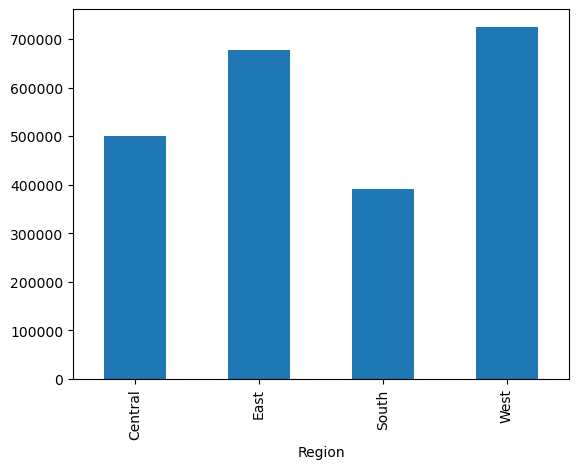

In [36]:
ss_df.groupby("Region")["Sales"].sum().plot.bar()

<AxesSubplot:xlabel='Region'>

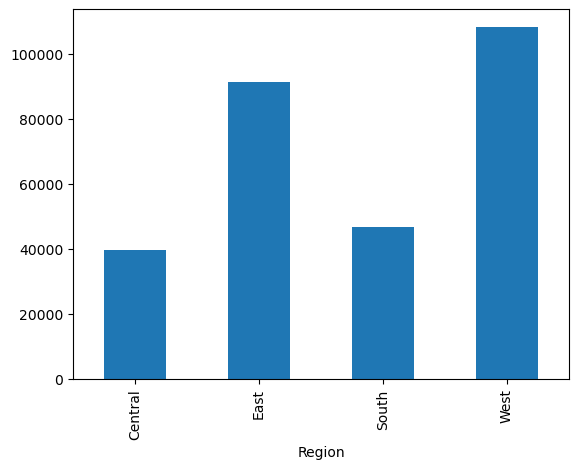

In [37]:
ss_df.groupby("Region")["Profit"].sum().plot.bar()

In [38]:
ss_df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

<AxesSubplot:xlabel='Category'>

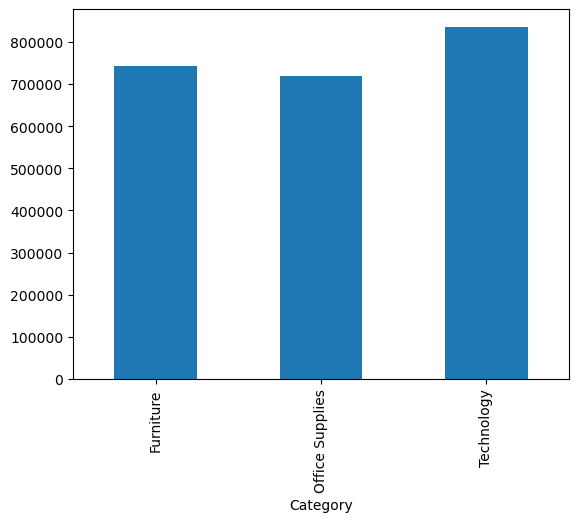

In [39]:
ss_df.groupby("Category")["Sales"].sum().plot.bar()

<AxesSubplot:xlabel='Category'>

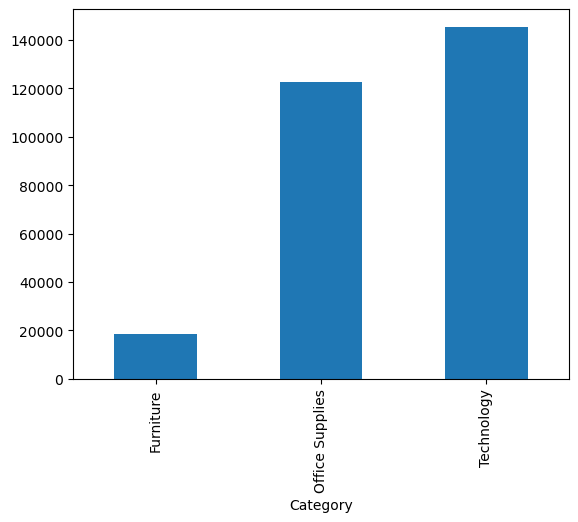

In [40]:
ss_df.groupby("Category")["Profit"].sum().plot.bar()